In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('ParisHousing.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [38]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [41]:
x=df.drop(['price'],axis=1).values
y=df['price'].values

In [42]:
x

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]], dtype=int64)

In [43]:
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [45]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [46]:
y_pred

array([8076034.62, 3733061.78, 8564629.5 , ...,  538868.6 , 2749524.18,
       5950046.72])

In [47]:
mean_squared_error(y_pred,y_test)

5847664158.119841

In [48]:
mean_squared_error(y_pred,y_test)**(1/2)

76470.02130325217

In [49]:
from sklearn.metrics import mean_absolute_error

In [50]:
mean_absolute_error(y_pred,y_test)

60568.40194400003

In [51]:
test=pd.DataFrame(y_test,columns=['y_test'])

In [52]:
test['y_pred']=y_pred

In [53]:
test

,y_test,y_pred
0,7964369.6,8076034.62
1,3713548.9,3733061.78
2,8553019.2,8564629.50
3,6428666.2,6532716.34
4,6465184.9,6567322.58
...,...,...
2495,5161447.9,5064148.60
2496,7248658.3,7205041.42
2497,541400.2,538868.60
2498,2744762.0,2749524.18


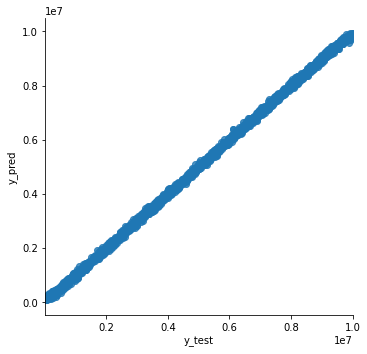

In [54]:
sns.lmplot(data=test,x='y_test',y='y_pred')

In [55]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred=linear.predict(x_test)

In [57]:
mean_squared_error(y_pred,y_test)

3633660.396713503

In [58]:
mean_absolute_error(y_pred,y_test)

1491.6612375947968

In [59]:
test['y_test']=y_test
test['y_pred']=y_pred

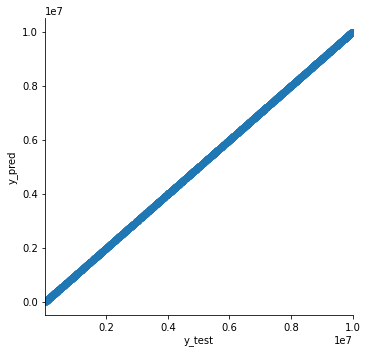

In [60]:
sns.lmplot(data=test,x='y_test',y='y_pred')